# **Data content - Analysis of product semantics**

In this file, there will be an analysis of product sematics done.

There are 5 tables which will be considered. They include information as per below:



*   **Sellers**: seller_id, seller_zip_code_prefix, seller_city, seller_state;
*   **Order_items**: order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_val;
*   **Orders**: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date;
*   **Products**: product_id, product_category_item, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm;
* **Order_reviews**: review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation+date, review_answer_timestamp.

To prepare analysis, above data will be merged and based on this conclusions and observations will me made.

Primarily, each file will be considered separately, finally they will me merged.

# **Installation and imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('ggplot')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

!pip install googletrans==3.1.0a0

import googletrans
from googletrans import *

warnings.filterwarnings('ignore')

from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=e20a803171d68eb738189b9a2db7097cb2a4973c7090b7587ed2c64a8bb3bbb3
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Analysis of Orders data**

In [ ]:
# Load orders data and parse columns with dates
orders = pd.read_csv("gdrive/My Drive/Task 3/orders.csv", parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [ ]:
# Shape of data
orders.shape

(99441, 8)

In [ ]:
# First 5 rows of data
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [ ]:
# Data types - 3 object and 5 datetime
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [ ]:
# Unique value in each column
print(orders.nunique())

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = orders[orders.duplicated()]
duplicate

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

In [ ]:
# Data info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
# Check for null values (null values occur for columns order_approved_at, order_delivered_carrier_date, order_delivered_customer_date - insignificant amount)
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
# Simplify the column names
orders.columns = (['order_id', 'customer_id', 'order_status', 'order_purchase', 'order_approved', 'order_carrier', 'order_customer', 'order_delivery'])

In [ ]:
# Reduce the memory thanks to changing the type of columns from object to categorical (order_status column)
orders['order_status'] = orders['order_status'].astype('category')

In [ ]:
# Check the info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        99441 non-null  object        
 1   customer_id     99441 non-null  object        
 2   order_status    99441 non-null  category      
 3   order_purchase  99441 non-null  datetime64[ns]
 4   order_approved  99281 non-null  datetime64[ns]
 5   order_carrier   97658 non-null  datetime64[ns]
 6   order_customer  96476 non-null  datetime64[ns]
 7   order_delivery  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [ ]:
# Statistics for categorical data
print(orders.describe(include = 'category').T)

              count unique        top   freq
order_status  99441      8  delivered  96478


In [ ]:
# Replace null values in each column by 'No data'
orders = orders.replace(np.nan, 'No data')

In [ ]:
# Check if null values still appear - they do not
null_data = orders[orders.isnull().any(axis=1)]
null_data

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase, order_approved, order_carrier, order_customer, order_delivery]
Index: []

In [ ]:
# Unique values for order_status column
orders['order_status'].unique()

['delivered', 'invoiced', 'shipped', 'processing', 'unavailable', 'canceled', 'created', 'approved']
Categories (8, object): ['approved', 'canceled', 'created', 'delivered', 'invoiced', 'processing',
                         'shipped', 'unavailable']

In [ ]:
# Group by order_status column - the most orders have status delivered, the least - approved and created
occur = orders.groupby(['order_status'], as_index=False).size()
by_status = pd.DataFrame(occur)
print(by_status)

  order_status   size
0     approved      2
1     canceled    625
2      created      5
3    delivered  96478
4     invoiced    314
5   processing    301
6      shipped   1107
7  unavailable    609


# **Analysis of Order_items data**

In [ ]:
# Load items data and parse column with date
items = pd.read_csv("gdrive/My Drive/Task 3/order_items.csv", parse_dates=['shipping_limit_date'])

In [ ]:
# Shape of data
items.shape

(112650, 7)

In [ ]:
# First 5 rows of data
items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [ ]:
# Data types - 3 numerical, 3 object, 1 datetime
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [ ]:
# Unique value in each column
print(items.nunique())

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = items[items.duplicated()]
duplicate

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []

In [ ]:
# Data info
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# Check for null values - no null values
print(items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


# **Analysis of Products data**

In [ ]:
# Load products data
products = pd.read_csv("gdrive/My Drive/Task 3/products.csv")

In [ ]:
# Shape of data
products.shape

(32951, 9)

In [ ]:
# First 5 rows of data
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
# Data types - 7 numerical and 2 object
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
# Unique value in each column
print(products.nunique())

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = products[products.duplicated()]
duplicate

Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []

In [ ]:
# Data info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Check for null values - insignificant amount
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [ ]:
# Rows with missing values will be dropped
products = products.dropna(axis = 0)

In [ ]:
# Check if missing values still appear - they do not
print(products.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
# Column product_category_name consist of non-English items.
# They will be translated thanks to additional table product_category_name_translation.
# Load category data
category = pd.read_csv("gdrive/My Drive/Task 3/product_category_name_translation.csv")
category.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
# Check for null values - no null values
print(category.isnull().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [ ]:
# Merge product and category tables on product_category_name column
pro = pd.merge(products, category, on='product_category_name')
pro.head()

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2  0d009643171aee696f4733340bc2fdd0            perfumaria   
3  b1eae565a61935e0011ee7682fef9dc9            perfumaria   
4  8da90b37f0fb171b4877c124f965b1f6            perfumaria   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 39.0                       346.0                 2.0   
2                 52.0                       150.0                 1.0   
3                 49.0                       460.0                 2.0   
4                 56.0                       733.0                 3.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1             400.0               27.0                5.0              20.0   
2             422.0               21.0               16.0              18.0   
3             267.0               17.0               13.0              17.0   
4             377.0               18.0               13.0              15.0   

  product_category_name_english  
0                     perfumery  
1                     perfumery  
2                     perfumery  
3                     perfumery  
4                     perfumery

In [ ]:
# Check for null values - no null values
print(pro.isnull().sum())

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


In [ ]:
# Drop column with non-English product_category_name
pro.drop(['product_category_name'], axis=1, inplace=True)
pro.head()

product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  6a2fb4dd53d2cdb88e0432f1284a004c                 39.0   
2  0d009643171aee696f4733340bc2fdd0                 52.0   
3  b1eae565a61935e0011ee7682fef9dc9                 49.0   
4  8da90b37f0fb171b4877c124f965b1f6                 56.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       346.0                 2.0             400.0   
2                       150.0                 1.0             422.0   
3                       460.0                 2.0             267.0   
4                       733.0                 3.0             377.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               27.0                5.0              20.0   
2               21.0               16.0              18.0   
3               17.0               13.0              17.0   
4               18.0               13.0              15.0   

  product_category_name_english  
0                     perfumery  
1                     perfumery  
2                     perfumery  
3                     perfumery  
4                     perfumery

In [ ]:
# Simplify the column names
products.columns = (['product_id', 'product_name', 'product_name_len', 'product_des_len', 'product_photos_qty', 'product_weight', 'product_length', 'product_height', 'product_width'])

# **Analysis of Sellers data**

In [ ]:
# Load sellers data
sellers = pd.read_csv("gdrive/My Drive/Task 3/sellers.csv")

In [ ]:
# Shape of data
sellers.shape

(3095, 4)

In [ ]:
# First 5 rows of data
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
# Data types - 1 numerical and 3 object
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [ ]:
# Unique value in each column
print(sellers.nunique())

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = sellers[sellers.duplicated()]
duplicate

Empty DataFrame
Columns: [seller_id, seller_zip_code_prefix, seller_city, seller_state]
Index: []

In [ ]:
# Data info
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Check for null values - no null positions
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [ ]:
# Simplify the column names
sellers.columns = (['seller_id', 'seller_zip', 'seller_city', 'seller_state'])

# **Analysis of Order_reviews data**

In [ ]:
# Load reviews data and parse columns with dates
reviews = pd.read_csv("gdrive/My Drive/Task 3/order_reviews.csv", parse_dates=['review_creation_date', 'review_answer_timestamp'])

In [ ]:
# Shape of data
reviews.shape

(100000, 7)

In [ ]:
# First 5 rows of data
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
# Data types - 4 object, int and 2 datetime
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [ ]:
# Unique value in each column
print(reviews.nunique())

review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
review_creation_date         637
review_answer_timestamp    99010
dtype: int64


In [ ]:
# Check for duplicated rows - no duplicates
duplicate = reviews[reviews.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp]
Index: []


In [ ]:
# Check for null values - a lot of nulls in tittle and message columns
print(reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
# Display rows with missing review_comment_message but with value in title column
reviews[reviews['review_comment_message'].isna() & ~reviews['review_comment_title'].isna()]

review_id                          order_id  \
53     1edd1a85161468a77e5fcb165be9b294  d8e17cc85323061493b16b68a130bcff   
104    352609f0f2d34ce5d3b8de817ee948d5  96b947c986b42f213c9e6b8ccccedb89   
220    a89a2b0c2014bc49a0f87f1eedb7b269  22b1eef278d4416c1e867a55d1c39fea   
225    cdc5c81bd9377ccbf9cb95f05648c31b  18956b40b774d6384c8539cd61784bd7   
497    b50001aa0bbd7557c4ad80eee167a2a1  daece90b61801c766fe21e0922574566   
...                                 ...                               ...   
99798  8b46f9e835a1644a414a9753b1d9539d  4b2113709e5d5f3760113b4a980cc88d   
99835  3103d2a4e5556d9c00c29e820958b5e7  0ff30e9eb2b70b51c2788ec38f266a0e   
99857  451849d56168ddedbe4d4ef3749af6ea  d709030e94d8f232fbfd24947c02a10a   
99951  d8ab64a06366d369a9cdbed694e7ee93  c3b620f59a689c3ca6b5884d2f6c6ac8   
99974  40743b46a0ee86375cedb95e82b78d75  3e93213bb8fdda91186b4018b2fe0030   

       review_score       review_comment_title review_comment_message  \
53                5                      Ótimo                    NaN   
104               3      Não recebi o produto.                    NaN   
220               5  Entrega antes do previsto                    NaN   
225               5                  Recomendo                    NaN   
497               5                     Ótimo                     NaN   
...             ...                        ...                    ...   
99798             5                  Excelente                    NaN   
99835             5           Super satisfeito                    NaN   
99857             5                  muito bom                    NaN   
99951             5            super recomendo                    NaN   
99974             5            OTIMA EMBALAGEM                    NaN   

      review_creation_date review_answer_timestamp  
53              2018-06-02     2018-06-02 23:15:37  
104             2018-08-25     2018-08-25 20:53:41  
220             2018-05-26     2018-05-28 22:46:27  
225             2018-06-22     2018-06-24 23:07:08  
497             2018-05-05     2018-05-07 17:12:36  
...                    ...                     ...  
99798           2018-08-15     2018-08-15 21:47:01  
99835           2018-05-19     2018-05-20 23:20:22  
99857           2018-06-22     2018-06-23 13:08:58  
99951           2018-06-13     2018-07-02 22:17:07  
99974           2018-08-08     2018-08-08 16:56:16  

[1729 rows x 7 columns]

In [ ]:
# Put the data from column title to message once message is missing
reviews['review_comment_message'] = reviews['review_comment_message'].where(~reviews['review_comment_message'].isna(), reviews['review_comment_title'])

In [ ]:
# Check if the amount of missing messages decreased
print(reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     56518
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
# Delete column review_comment_title (too many missing values, repetition of review_comment_message)
reviews = reviews.drop('review_comment_title', axis=1)

In [ ]:
# Check null values
print(reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_message     56518
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
# Drop rows with missing values for review_comment_message column
reviews = reviews.dropna()

In [ ]:
# Check for null values - they do not exist
print(reviews.isnull().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


# **Merge data into one DataFrame**

In [ ]:
# Merge tables with Order_items and Orders on order_id column
items_orders = pd.merge(items, orders, on='order_id', how='left')
items_orders.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  \
0 2017-09-19 09:45:35   58.90          13.29   
1 2017-05-03 11:05:13  239.90          19.93   
2 2018-01-18 14:48:30  199.00          17.87   
3 2018-08-15 10:10:18   12.99          12.79   
4 2017-02-13 13:57:51  199.90          18.14   

                        customer_id order_status      order_purchase  \
0  3ce436f183e68e07877b285a838db11a    delivered 2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered 2017-04-26 10:53:06   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered 2018-01-14 14:33:31   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered 2018-08-08 10:00:35   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered 2017-02-04 13:57:51   

        order_approved        order_carrier       order_customer  \
0  2017-09-13 09:45:35  2017-09-19 18:34:16  2017-09-20 23:43:48   
1  2017-04-26 11:05:13  2017-05-04 14:35:00  2017-05-12 16:04:24   
2  2018-01-14 14:48:30  2018-01-16 12:36:48  2018-01-22 13:19:16   
3  2018-08-08 10:10:18  2018-08-10 13:28:00  2018-08-14 13:32:39   
4  2017-02-04 14:10:13  2017-02-16 09:46:09  2017-03-01 16:42:31   

  order_delivery  
0     2017-09-29  
1     2017-05-15  
2     2018-02-05  
3     2018-08-20  
4     2017-03-17

In [ ]:
# Shape of data
items_orders.shape

(112650, 14)

In [ ]:
# Check whether null values exist - no nulls
print(len(items_orders[items_orders.isna().any(axis=1)]))

0


In [ ]:
# Merge table Products with Items_orders on product_id column
items_orders_products = pd.merge(items_orders, pro, on='product_id', how='left')
items_orders_products.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  \
0 2017-09-19 09:45:35   58.90          13.29   
1 2017-05-03 11:05:13  239.90          19.93   
2 2018-01-18 14:48:30  199.00          17.87   
3 2018-08-15 10:10:18   12.99          12.79   
4 2017-02-13 13:57:51  199.90          18.14   

                        customer_id order_status      order_purchase  ...  \
0  3ce436f183e68e07877b285a838db11a    delivered 2017-09-13 08:59:02  ...   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered 2017-04-26 10:53:06  ...   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered 2018-01-14 14:33:31  ...   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered 2018-08-08 10:00:35  ...   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered 2017-02-04 13:57:51  ...   

        order_customer order_delivery product_name_lenght  \
0  2017-09-20 23:43:48     2017-09-29                58.0   
1  2017-05-12 16:04:24     2017-05-15                56.0   
2  2018-01-22 13:19:16     2018-02-05                59.0   
3  2018-08-14 13:32:39     2018-08-20                42.0   
4  2017-03-01 16:42:31     2017-03-17                59.0   

  product_description_lenght  product_photos_qty  product_weight_g  \
0                      598.0                 4.0             650.0   
1                      239.0                 2.0           30000.0   
2                      695.0                 2.0            3050.0   
3                      480.0                 1.0             200.0   
4                      409.0                 1.0            3750.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               28.0                9.0              14.0   
1               50.0               30.0              40.0   
2               33.0               13.0              33.0   
3               16.0               10.0              15.0   
4               35.0               40.0              30.0   

   product_category_name_english  
0                     cool_stuff  
1                       pet_shop  
2                furniture_decor  
3                      perfumery  
4                   garden_tools  

[5 rows x 22 columns]

In [ ]:
# Shape of data
items_orders_products.shape

(112650, 22)

In [ ]:
# Check whether null values exist
print(len(items_orders_products[items_orders_products.isna().any(axis=1)]))

1628


In [ ]:
# Drop rows with missing values
items_orders_products = items_orders_products.dropna()
items_orders_products = items_orders_products.reset_index(drop=True)
items_orders_products.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  \
0 2017-09-19 09:45:35   58.90          13.29   
1 2017-05-03 11:05:13  239.90          19.93   
2 2018-01-18 14:48:30  199.00          17.87   
3 2018-08-15 10:10:18   12.99          12.79   
4 2017-02-13 13:57:51  199.90          18.14   

                        customer_id order_status      order_purchase  ...  \
0  3ce436f183e68e07877b285a838db11a    delivered 2017-09-13 08:59:02  ...   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered 2017-04-26 10:53:06  ...   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered 2018-01-14 14:33:31  ...   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered 2018-08-08 10:00:35  ...   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered 2017-02-04 13:57:51  ...   

        order_customer order_delivery product_name_lenght  \
0  2017-09-20 23:43:48     2017-09-29                58.0   
1  2017-05-12 16:04:24     2017-05-15                56.0   
2  2018-01-22 13:19:16     2018-02-05                59.0   
3  2018-08-14 13:32:39     2018-08-20                42.0   
4  2017-03-01 16:42:31     2017-03-17                59.0   

  product_description_lenght  product_photos_qty  product_weight_g  \
0                      598.0                 4.0             650.0   
1                      239.0                 2.0           30000.0   
2                      695.0                 2.0            3050.0   
3                      480.0                 1.0             200.0   
4                      409.0                 1.0            3750.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               28.0                9.0              14.0   
1               50.0               30.0              40.0   
2               33.0               13.0              33.0   
3               16.0               10.0              15.0   
4               35.0               40.0              30.0   

   product_category_name_english  
0                     cool_stuff  
1                       pet_shop  
2                furniture_decor  
3                      perfumery  
4                   garden_tools  

[5 rows x 22 columns]

In [ ]:
# Check whether null values exist - they do not
print(len(items_orders_products[items_orders_products.isna().any(axis=1)]))

0


In [ ]:
# Merge table Sellers with Items_orders_products on seller_id column
df = pd.merge(items_orders_products, sellers, on='seller_id', how='left')
df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  \
0 2017-09-19 09:45:35   58.90          13.29   
1 2017-05-03 11:05:13  239.90          19.93   
2 2018-01-18 14:48:30  199.00          17.87   
3 2018-08-15 10:10:18   12.99          12.79   
4 2017-02-13 13:57:51  199.90          18.14   

                        customer_id order_status      order_purchase  ...  \
0  3ce436f183e68e07877b285a838db11a    delivered 2017-09-13 08:59:02  ...   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered 2017-04-26 10:53:06  ...   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered 2018-01-14 14:33:31  ...   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered 2018-08-08 10:00:35  ...   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered 2017-02-04 13:57:51  ...   

  product_description_lenght product_photos_qty product_weight_g  \
0                      598.0                4.0            650.0   
1                      239.0                2.0          30000.0   
2                      695.0                2.0           3050.0   
3                      480.0                1.0            200.0   
4                      409.0                1.0           3750.0   

  product_length_cm  product_height_cm  product_width_cm  \
0              28.0                9.0              14.0   
1              50.0               30.0              40.0   
2              33.0               13.0              33.0   
3              16.0               10.0              15.0   
4              35.0               40.0              30.0   

   product_category_name_english  seller_zip    seller_city  seller_state  
0                     cool_stuff       27277  volta redonda            SP  
1                       pet_shop        3471      sao paulo            SP  
2                furniture_decor       37564  borda da mata            MG  
3                      perfumery       14403         franca            SP  
4                   garden_tools       87900         loanda            PR  

[5 rows x 25 columns]

In [ ]:
# Shape of data
df.shape

(111022, 25)

In [ ]:
# Check whether null values exist
print(len(df[df.isna().any(axis=1)]))

0


In [ ]:
# Merge table Order_reviews with df on order_id column
c = pd.merge(df, reviews, on='order_id', how='right')
c.head()

order_id  order_item_id  \
0  658677c97b385a9be170737859d3511b            1.0   
1  8e6bfb81e283fa7e4f11123a3fb894f1            1.0   
2  b9bf720beb4ab3728760088589c62129            1.0   
3  9d6f15f95d01e79bd1349cc208361f09            1.0   
4  e51478e7e277a83743b6f9991dbfa3fb            1.0   

                         product_id                         seller_id  \
0  52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
1  3880d25d502b15b1de6fddc42ad1d67a  989becdce12ebc39863c2bceab6f3ca1   
2  61a4100ccd6d9c4c808a1fd954ddb8ad  05ff92fedb5be47920fea08e501238b9   
3  acffe5d7cd56e6b564cf6841486644ff  db4350fd57ae30082dec7acbaacc17f9   
4  6871a3c157d6f51697e887f3c3598479  974cf2cb8f4b7add98709c30df02fe10   

  shipping_limit_date    price  freight_value  \
0 2017-04-13 17:55:19   179.99          42.85   
1 2018-02-15 15:48:21  1199.00         134.25   
2 2018-05-17 10:31:31   586.56          26.69   
3 2018-02-16 16:27:39    35.00           7.78   
4 2018-05-24 18:31:29    89.99          13.07   

                        customer_id order_status      order_purchase  ...  \
0  de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered 2017-04-09 17:41:13  ...   
1  5986b333ca0d44534a156a52a8e33a83    delivered 2018-02-10 10:59:03  ...   
2  a5224bdc7685fd39cd7a23404415493d    delivered 2018-05-14 10:29:02  ...   
3  8ebbeb09e94d1e789142983f73faa9cd    delivered 2018-02-12 16:07:34  ...   
4  659ded3e9b43aaf51cf9586d03033b46    delivered 2018-05-18 18:20:45  ...   

  product_width_cm product_category_name_english seller_zip   seller_city  \
0             20.0                  garden_tools    37175.0      ilicinea   
1             50.0                sports_leisure    81730.0      curitiba   
2             24.0              small_appliances    98803.0  santo angelo   
3             11.0                 health_beauty     3126.0     sao paulo   
4             15.0         computers_accessories    14802.0    araraquara   

   seller_state                         review_id  review_score  \
0            MG  e64fb393e7b32834bb789ff8bb30750e             5   
1            PR  f7c4243c7fe1938f181bec41a392bdeb             5   
2            RS  8670d52e15e00043ae7de4c01cc2fe06             4   
3            SP  4b49719c8a200003f700d3d986ea1a19             4   
4            SP  3948b09f7c818e2d86c9a546758b2335             5   

                              review_comment_message  review_creation_date  \
0              Recebi bem antes do prazo estipulado.            2017-04-21   
1  Parabéns lojas lannister adorei comprar pela I...            2018-03-01   
2  aparelho eficiente. no site a marca do aparelh...            2018-05-22   
3    Mas um pouco ,travando...pelo valor ta Boa.\r\n            2018-02-16   
4  Vendedor confiável, produto ok e entrega antes...            2018-05-23   

   review_answer_timestamp  
0      2017-04-21 22:02:06  
1      2018-03-02 10:26:53  
2      2018-05-23 16:45:47  
3      2018-02-20 10:52:22  
4      2018-05-24 03:00:01  

[5 rows x 30 columns]

In [ ]:
# Shape of data
c.shape

(50920, 30)

In [ ]:
# Check whether null values exist
print(len(c[c.isna().any(axis=1)]))

1173


In [ ]:
# Drop rows with missing values
c = c.dropna()
c = c.reset_index(drop=True)
c.head()

order_id  order_item_id  \
0  658677c97b385a9be170737859d3511b            1.0   
1  8e6bfb81e283fa7e4f11123a3fb894f1            1.0   
2  b9bf720beb4ab3728760088589c62129            1.0   
3  9d6f15f95d01e79bd1349cc208361f09            1.0   
4  e51478e7e277a83743b6f9991dbfa3fb            1.0   

                         product_id                         seller_id  \
0  52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
1  3880d25d502b15b1de6fddc42ad1d67a  989becdce12ebc39863c2bceab6f3ca1   
2  61a4100ccd6d9c4c808a1fd954ddb8ad  05ff92fedb5be47920fea08e501238b9   
3  acffe5d7cd56e6b564cf6841486644ff  db4350fd57ae30082dec7acbaacc17f9   
4  6871a3c157d6f51697e887f3c3598479  974cf2cb8f4b7add98709c30df02fe10   

  shipping_limit_date    price  freight_value  \
0 2017-04-13 17:55:19   179.99          42.85   
1 2018-02-15 15:48:21  1199.00         134.25   
2 2018-05-17 10:31:31   586.56          26.69   
3 2018-02-16 16:27:39    35.00           7.78   
4 2018-05-24 18:31:29    89.99          13.07   

                        customer_id order_status      order_purchase  ...  \
0  de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered 2017-04-09 17:41:13  ...   
1  5986b333ca0d44534a156a52a8e33a83    delivered 2018-02-10 10:59:03  ...   
2  a5224bdc7685fd39cd7a23404415493d    delivered 2018-05-14 10:29:02  ...   
3  8ebbeb09e94d1e789142983f73faa9cd    delivered 2018-02-12 16:07:34  ...   
4  659ded3e9b43aaf51cf9586d03033b46    delivered 2018-05-18 18:20:45  ...   

  product_width_cm product_category_name_english seller_zip   seller_city  \
0             20.0                  garden_tools    37175.0      ilicinea   
1             50.0                sports_leisure    81730.0      curitiba   
2             24.0              small_appliances    98803.0  santo angelo   
3             11.0                 health_beauty     3126.0     sao paulo   
4             15.0         computers_accessories    14802.0    araraquara   

   seller_state                         review_id  review_score  \
0            MG  e64fb393e7b32834bb789ff8bb30750e             5   
1            PR  f7c4243c7fe1938f181bec41a392bdeb             5   
2            RS  8670d52e15e00043ae7de4c01cc2fe06             4   
3            SP  4b49719c8a200003f700d3d986ea1a19             4   
4            SP  3948b09f7c818e2d86c9a546758b2335             5   

                              review_comment_message  review_creation_date  \
0              Recebi bem antes do prazo estipulado.            2017-04-21   
1  Parabéns lojas lannister adorei comprar pela I...            2018-03-01   
2  aparelho eficiente. no site a marca do aparelh...            2018-05-22   
3    Mas um pouco ,travando...pelo valor ta Boa.\r\n            2018-02-16   
4  Vendedor confiável, produto ok e entrega antes...            2018-05-23   

   review_answer_timestamp  
0      2017-04-21 22:02:06  
1      2018-03-02 10:26:53  
2      2018-05-23 16:45:47  
3      2018-02-20 10:52:22  
4      2018-05-24 03:00:01  

[5 rows x 30 columns]

In [ ]:
# Check whether null values exist - they do not
print(len(c[c.isna().any(axis=1)]))

0


# **Sentiment analysis**

In [ ]:
# Retrieve columns which will be used in further analysis
print(c.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase', 'order_approved', 'order_carrier',
       'order_customer', 'order_delivery', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip', 'seller_city',
       'seller_state', 'review_id', 'review_score', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')


In [ ]:
# Specify the columns
cols = c[['product_id', 'seller_id', 'order_status', 'price', 'product_category_name_english', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_city',
            'seller_state', 'review_score', 'review_comment_message']]

In [ ]:
# First 5 rows
cols.head()

product_id                         seller_id  \
0  52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
1  3880d25d502b15b1de6fddc42ad1d67a  989becdce12ebc39863c2bceab6f3ca1   
2  61a4100ccd6d9c4c808a1fd954ddb8ad  05ff92fedb5be47920fea08e501238b9   
3  acffe5d7cd56e6b564cf6841486644ff  db4350fd57ae30082dec7acbaacc17f9   
4  6871a3c157d6f51697e887f3c3598479  974cf2cb8f4b7add98709c30df02fe10   

  order_status    price product_category_name_english  product_weight_g  \
0    delivered   179.99                  garden_tools            7650.0   
1    delivered  1199.00                sports_leisure            9850.0   
2    delivered   586.56              small_appliances            1450.0   
3    delivered    35.00                 health_beauty             200.0   
4    delivered    89.99         computers_accessories             850.0   

   product_length_cm  product_height_cm  product_width_cm   seller_city  \
0               20.0               20.0              20.0      ilicinea   
1              105.0               35.0              50.0      curitiba   
2               24.0               24.0              24.0  santo angelo   
3               19.0                4.0              11.0     sao paulo   
4               25.0               11.0              15.0    araraquara   

  seller_state  review_score  \
0           MG             5   
1           PR             5   
2           RS             4   
3           SP             4   
4           SP             5   

                              review_comment_message  
0              Recebi bem antes do prazo estipulado.  
1  Parabéns lojas lannister adorei comprar pela I...  
2  aparelho eficiente. no site a marca do aparelh...  
3    Mas um pouco ,travando...pelo valor ta Boa.\r\n  
4  Vendedor confiável, produto ok e entrega antes...

In [ ]:
# Rename columns
cols.columns = ['product_id', 'seller_id', 'order_status', 'price', 'product_name', 'product_weight', 'product_length', 'product_height', 'product_width', 'seller_city',
            'seller_state', 'review_score', 'review_comment_message']

In [ ]:
cols.head()

product_id                         seller_id  \
0  52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
1  3880d25d502b15b1de6fddc42ad1d67a  989becdce12ebc39863c2bceab6f3ca1   
2  61a4100ccd6d9c4c808a1fd954ddb8ad  05ff92fedb5be47920fea08e501238b9   
3  acffe5d7cd56e6b564cf6841486644ff  db4350fd57ae30082dec7acbaacc17f9   
4  6871a3c157d6f51697e887f3c3598479  974cf2cb8f4b7add98709c30df02fe10   

  order_status    price           product_name  product_weight  \
0    delivered   179.99           garden_tools          7650.0   
1    delivered  1199.00         sports_leisure          9850.0   
2    delivered   586.56       small_appliances          1450.0   
3    delivered    35.00          health_beauty           200.0   
4    delivered    89.99  computers_accessories           850.0   

   product_length  product_height  product_width   seller_city seller_state  \
0            20.0            20.0           20.0      ilicinea           MG   
1           105.0            35.0           50.0      curitiba           PR   
2            24.0            24.0           24.0  santo angelo           RS   
3            19.0             4.0           11.0     sao paulo           SP   
4            25.0            11.0           15.0    araraquara           SP   

   review_score                             review_comment_message  
0             5              Recebi bem antes do prazo estipulado.  
1             5  Parabéns lojas lannister adorei comprar pela I...  
2             4  aparelho eficiente. no site a marca do aparelh...  
3             4    Mas um pouco ,travando...pelo valor ta Boa.\r\n  
4             5  Vendedor confiável, produto ok e entrega antes...

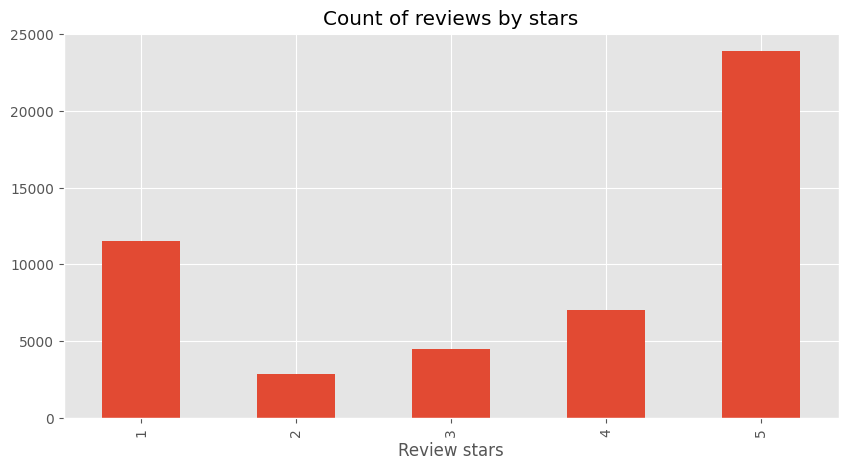

In [ ]:
# The frequency of each score - most comments have 5 stars, the lest - 2 stars
ax = cols['review_score'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars', figsize=(10,5))
ax.set_xlabel('Review stars')
plt.show()

In [ ]:
# Define translator to translate comments to English
translator = googletrans.Translator()

In [ ]:
# Divide all comments into 5 parts due to computing limitations
cols['review_comment_message'] = cols['review_comment_message'].astype(str)
part1 = cols[:10000]
part1['review_comment'] = part1['review_comment_message'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
part1 = part1.drop('review_comment_message', axis=1)
part1.head()

product_id                         seller_id  \
0  52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
1  3880d25d502b15b1de6fddc42ad1d67a  989becdce12ebc39863c2bceab6f3ca1   
2  61a4100ccd6d9c4c808a1fd954ddb8ad  05ff92fedb5be47920fea08e501238b9   
3  acffe5d7cd56e6b564cf6841486644ff  db4350fd57ae30082dec7acbaacc17f9   
4  6871a3c157d6f51697e887f3c3598479  974cf2cb8f4b7add98709c30df02fe10   

  order_status    price           product_name  product_weight  \
0    delivered   179.99           garden_tools          7650.0   
1    delivered  1199.00         sports_leisure          9850.0   
2    delivered   586.56       small_appliances          1450.0   
3    delivered    35.00          health_beauty           200.0   
4    delivered    89.99  computers_accessories           850.0   

   product_length  product_height  product_width   seller_city seller_state  \
0            20.0            20.0           20.0      ilicinea           MG   
1           105.0            35.0           50.0      curitiba           PR   
2            24.0            24.0           24.0  santo angelo           RS   
3            19.0             4.0           11.0     sao paulo           SP   
4            25.0            11.0           15.0    araraquara           SP   

   review_score                                     review_comment  
0             5  I received it well before the stipulated deadl...  
1             5  Congratulations lannister stores I loved shopp...  
2             4  efficient device. On the website the brand of ...  
3             4      But a little slow...for the price, it's good.  
4             5  Reliable seller, ok product and delivery on time.

In [ ]:
part2 = cols[10001:20000]
part2['review_comment'] = part2['review_comment_message'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
part2 = part2.drop('review_comment_message', axis=1)
part2.head()

product_id                         seller_id  \
10001  7f967740bec1ec031ac460084afcb4b1  bafc5aa11e413978be29040f51342e70   
10002  6642e66f26b6e23817ada36eeae229bc  17e34d8224d27a541263c4c64b11a56b   
10003  c1eee16d856657ad280936810ef3d080  014d9a685fd57276679edd00e07089e5   
10004  6f2d7833b8f0a094571ebddebdc6623a  ea8482cd71df3c1969d7b9473ff13abc   
10005  7d122633abe5616b25c4d1d42c6e2d72  3d871de0142ce09b7081e2b9d1733cb1   

      order_status   price           product_name  product_weight  \
10001    delivered  289.99             stationery          1900.0   
10002    delivered  155.40  computers_accessories           160.0   
10003    delivered   69.99             cool_stuff           113.0   
10004    delivered   42.99              telephony           350.0   
10005    delivered   89.00             stationery          6300.0   

       product_length  product_height  product_width           seller_city  \
10001            35.0            45.0           20.0        belo horizonte   
10002            17.0            12.0           15.0         riberao preto   
10003            22.0             8.0           17.0               maringa   
10004            17.0             4.0           13.0             sao paulo   
10005            38.0            30.0           28.0  campo limpo paulista   

      seller_state  review_score  \
10001           MG             5   
10002           SP             1   
10003           PR             1   
10004           SP             1   
10005           SP             5   

                                          review_comment  
10001                 I recommend they are very punctual  
10002                                                bom  
10003  The Case cover was missing with the film, they...  
10004  The Case cover was missing with the film, they...  
10005  Great product, delivered ahead of schedule\r\n...

In [ ]:
part3 = cols[20001:30000]
part3['review_comment'] = part3['review_comment_message'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
part3 = part3.drop('review_comment_message', axis=1)
part3.head()

product_id                         seller_id  \
20001  4ed86bcb86407328452ac1c5b3b89d67  3f8034bfc6b8b4135534975d49f04c63   
20002  4ed86bcb86407328452ac1c5b3b89d67  3f8034bfc6b8b4135534975d49f04c63   
20003  4ed86bcb86407328452ac1c5b3b89d67  3f8034bfc6b8b4135534975d49f04c63   
20004  4ed86bcb86407328452ac1c5b3b89d67  3f8034bfc6b8b4135534975d49f04c63   
20005  01cb96c64e8e35f29826a58963f6ecc5  8d899e15a5925f097cca50faa49b15e3   

      order_status  price               product_name  product_weight  \
20001    delivered   45.0                       baby           500.0   
20002    delivered   45.0                       baby           500.0   
20003    delivered   45.0                       baby           500.0   
20004    delivered   45.0                       baby           500.0   
20005    delivered   99.0  construction_tools_lights          7100.0   

       product_length  product_height  product_width seller_city seller_state  \
20001            30.0             8.0           35.0    curitiba           PR   
20002            30.0             8.0           35.0    curitiba           PR   
20003            30.0             8.0           35.0    curitiba           PR   
20004            30.0             8.0           35.0    curitiba           PR   
20005            43.0            23.0           43.0   sao roque           SP   

       review_score                                     review_comment  
20001             1  I ordered 4 adult pillows and 1 baby pillow ca...  
20002             1  I ordered 4 adult pillows and 1 baby pillow ca...  
20003             1  I ordered 4 adult pillows and 1 baby pillow ca...  
20004             1  I ordered 4 adult pillows and 1 baby pillow ca...  
20005             5  The lamp is beautiful, it arrived very well pa...

In [ ]:
# Problems with operation timed out has occured
part4 = cols[30001:40000]
part4['review_comment'] = part4['review_comment_message'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
part4 = part4.drop('review_comment_message', axis=1)
part4.head()

ReadTimeout: The read operation timed out

In [ ]:
# Problems with operation timed out has occured
part5 = cols[40001:]
part5['review_comment'] = part5['review_comment_message'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
part5 = part5.drop('review_comment_message', axis=1)
part5.head()

ReadTimeout: The read operation timed out

In [ ]:
# Merge 3 dataframes (should be 5 but there were above problems - more data will cause slightly different results)
data = pd.concat([part1, part2, part3], ignore_index=True)

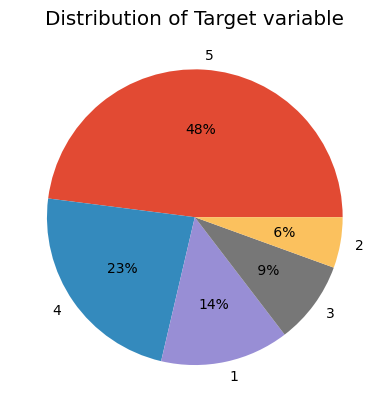

In [ ]:
# Check the distribution of target variable
plt.pie(data['review_score'].value_counts(), autopct='%2.f%%', labels = ['5', '4', '1', '3', '2'])
plt.title('Distribution of Target variable')
plt.show()

In [ ]:
# For sentiment analysis of reviews only messages and scores will be used, select necessary columns
data = data[['review_comment', 'review_score']]

In [ ]:
# Checkout top 5 reviews
data.head()

review_comment  review_score
0  I received it well before the stipulated deadl...             5
1  Congratulations lannister stores I loved shopp...             5
2  efficient device. On the website the brand of ...             4
3      But a little slow...for the price, it's good.             4
4  Reliable seller, ok product and delivery on time.             5

In [ ]:
# Data distribution
data['review_score'].value_counts()

review_score
5    14392
1     7009
4     4216
3     2719
2     1662
Name: count, dtype: int64

In [ ]:
# Get the list of english language stopwords from the nltk corpus
english_stopwords = stopwords.words('english')
STOPWORDS = set(english_stopwords)

In [ ]:
#Remove stopwords from the reviews
def clean_stopwords(text):
  value=' '.join(word for word in text.split() if word not in STOPWORDS)
  return value

In [ ]:
# Apply clean_stopwords function on review to remove the stopwords
data['review_comment']=data['review_comment'].apply(lambda x: clean_stopwords(x))

In [ ]:
# Define punctuation
english_punctuations = string.punctuation
print(english_punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Clear and remove punctuations
punctuation_list = english_punctuations

def cleaning_punctuations(text):
    translator=str.maketrans('', '',punctuation_list)
    return text.translate(translator)

data['review_comment'] = data['review_comment'].apply(lambda text: cleaning_punctuations(text))

In [ ]:
# Check first 5 rows
data.head()

review_comment  review_score
0                I received well stipulated deadline             5
1  Congratulations lannister stores I loved shopp...             5
2  efficient device On website brand device print...             4
3                      But little slowfor price good             4
4           Reliable seller ok product delivery time             5

In [ ]:
# Clean and remove repeated charecters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+',r'1',text)

data['review_comment']=data['review_comment'].apply(lambda text: cleaning_repeating_char(text))
data.head()

review_comment  review_score
0                I received well stipulated deadline             5
1  Congratulations lannister stores I loved shopp...             5
2  efficient device On website brand device print...             4
3                      But little slowfor price good             4
4           Reliable seller ok product delivery time             5

In [ ]:
# Clean capital letters
def cleaning_capitals(text):
    return text.lower()

data['review_comment']=data['review_comment'].apply(lambda text: cleaning_capitals(text))
data.head()

review_comment  review_score
0                i received well stipulated deadline             5
1  congratulations lannister stores i loved shopp...             5
2  efficient device on website brand device print...             4
3                      but little slowfor price good             4
4           reliable seller ok product delivery time             5

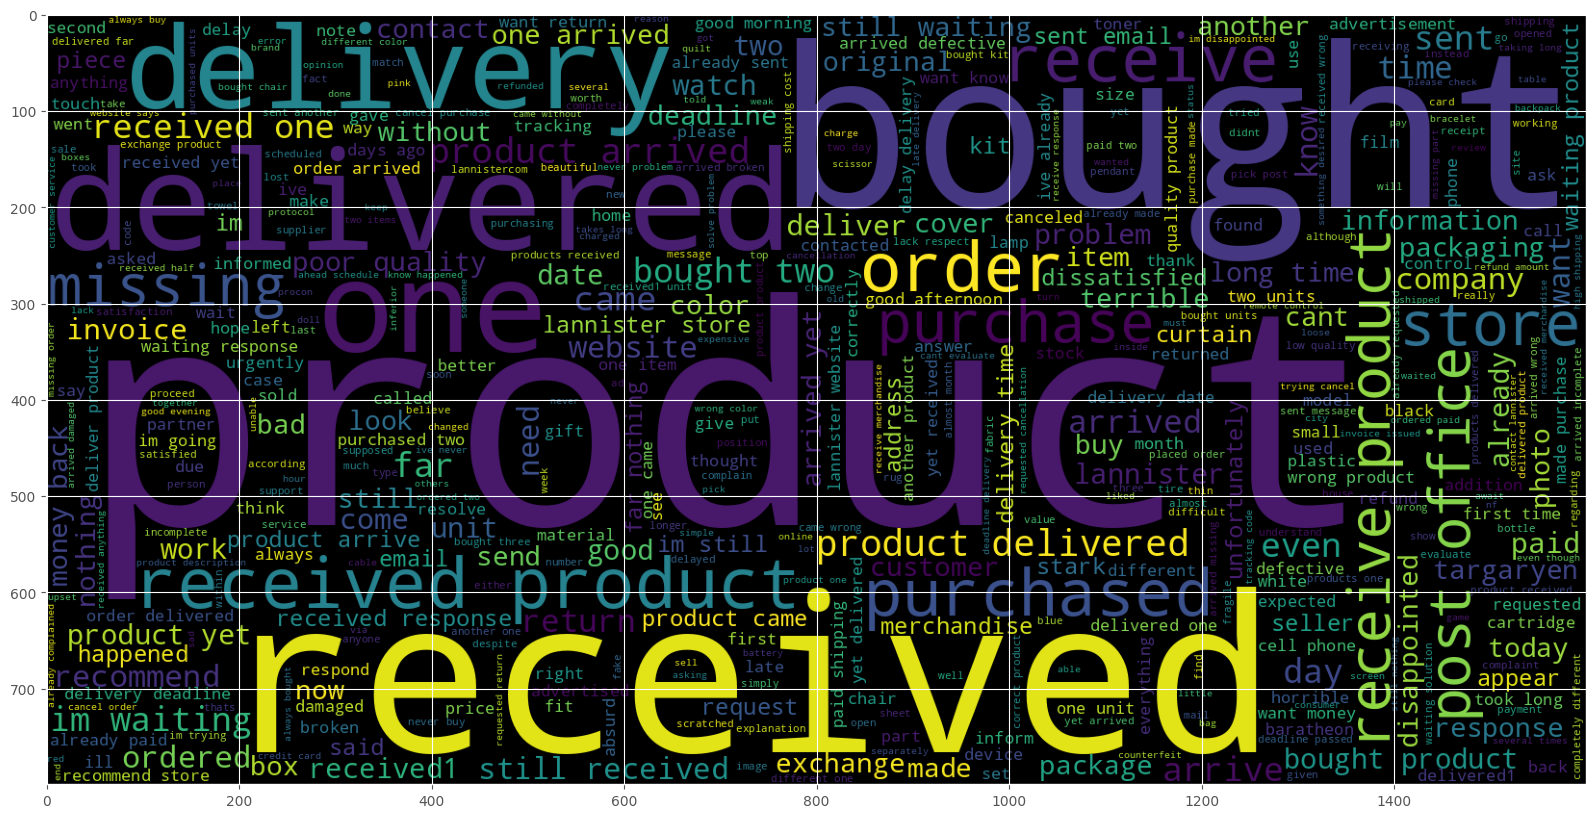

In [ ]:
# Plot cloud of words for negative class
negative_reviews=data[(data['review_score']==1) | (data['review_score']==2)]["review_comment"]
plt.figure(figsize=(20,10))

wc= WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='black').generate(' '.join(np.array(negative_reviews)))
plt.imshow(wc)
plt.show()

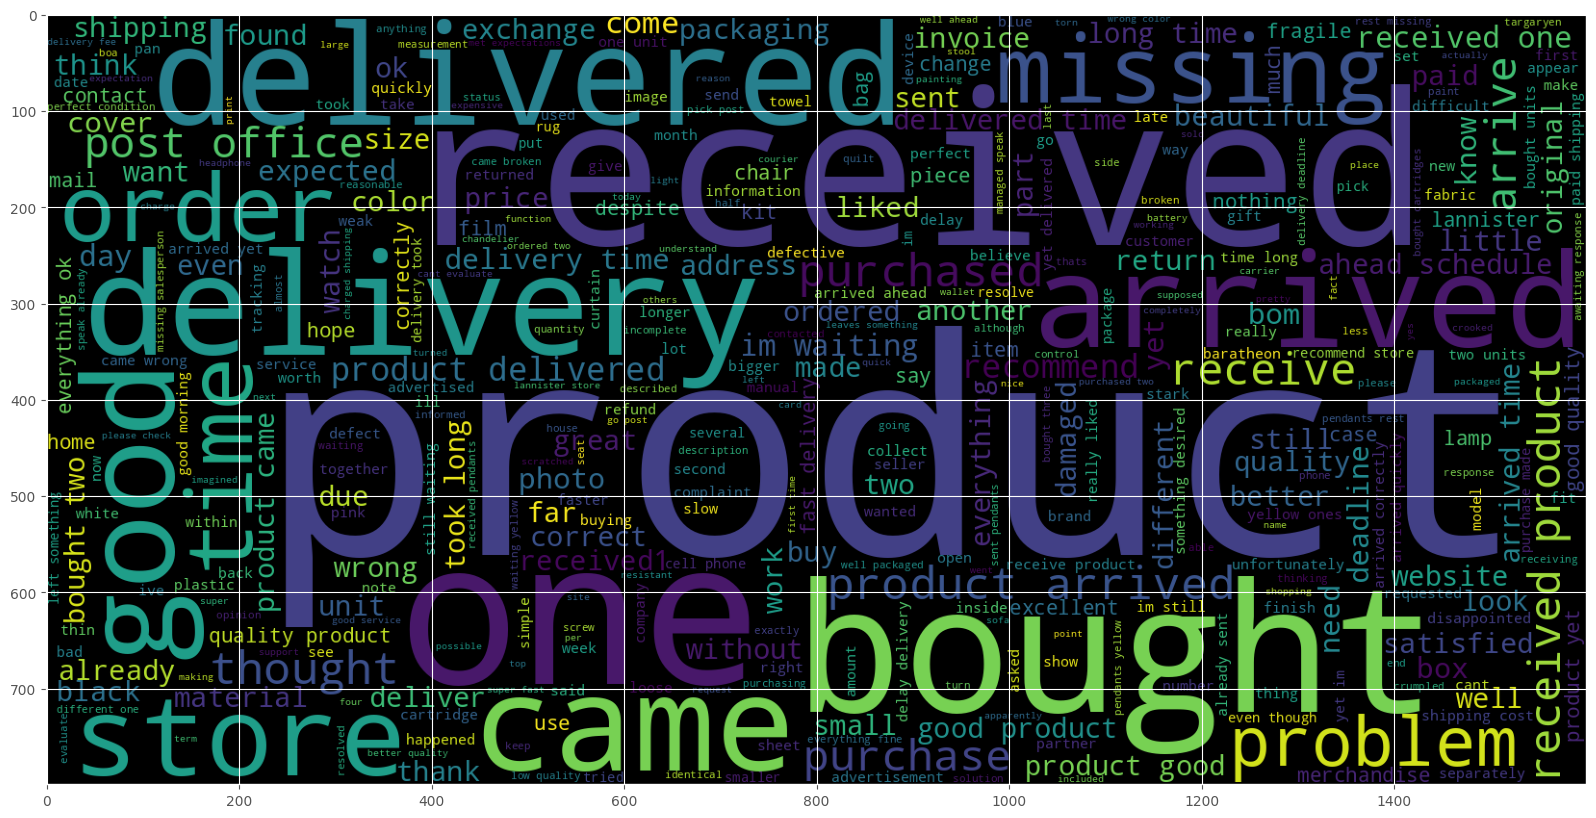

In [ ]:
# Plot cloud of words for neutral class
neutral_reviews=data[data['review_score']==3]["review_comment"]
plt.figure(figsize=(20,10))

wc= WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='black').generate(' '.join(np.array(neutral_reviews)))
plt.imshow(wc)
plt.show()

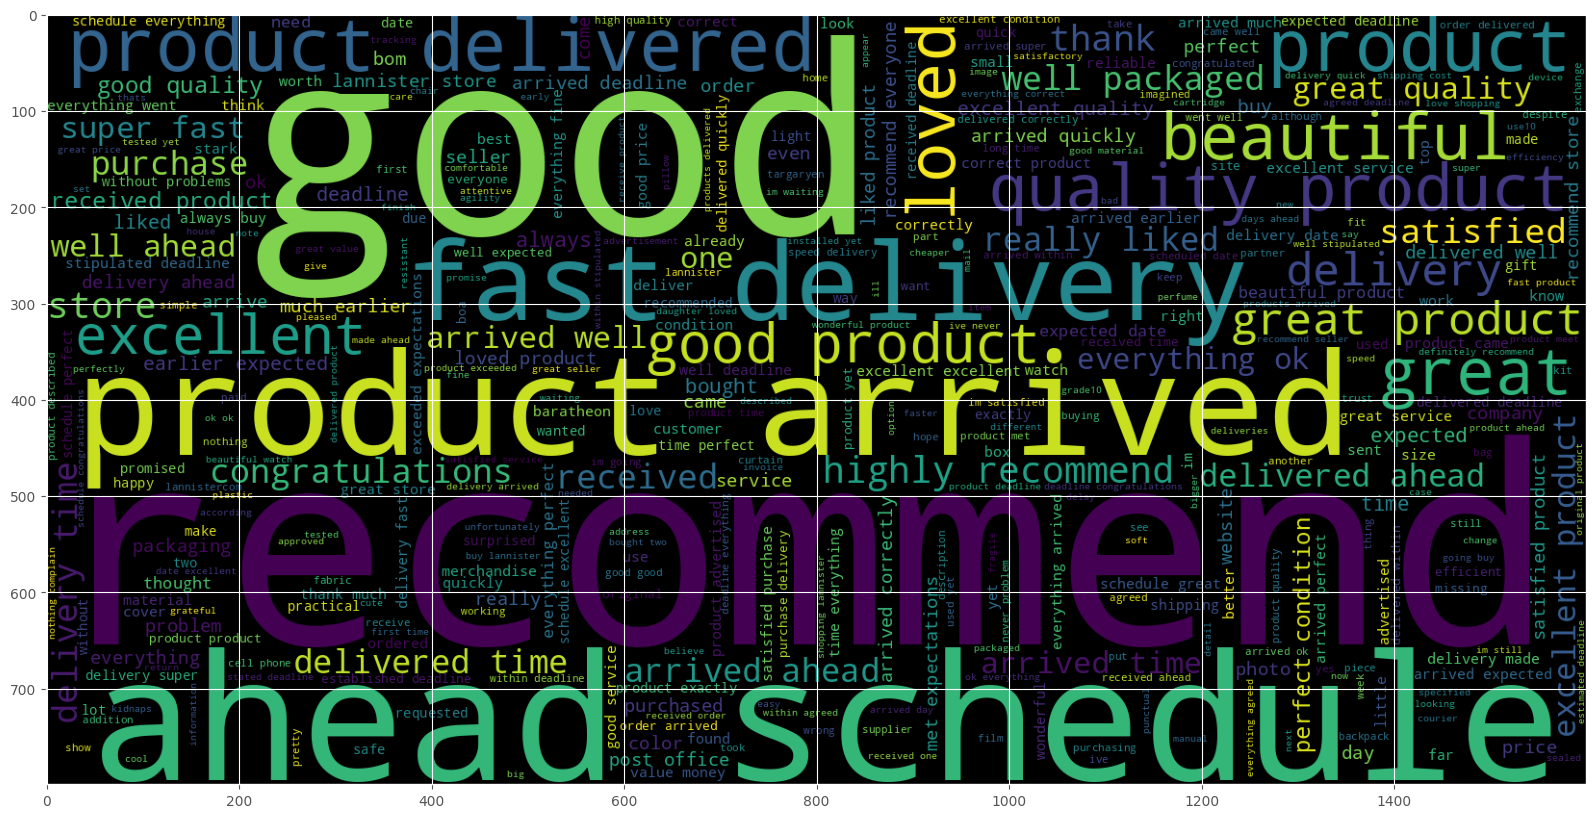

In [ ]:
# Plot cloud of words for positive class
positive_reviews=data[(data['review_score']==4) | (data['review_score']==5)]["review_comment"]
plt.figure(figsize=(20,10))

wc= WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='black').generate(' '.join(np.array(positive_reviews)))
plt.imshow(wc)
plt.show()

In [ ]:
# Word tokenization of reviews
data['review_comment']=data['review_comment'].apply(word_tokenize)
data.head()

review_comment  review_score
0          [i, received, well, stipulated, deadline]             5
1  [congratulations, lannister, stores, i, loved,...             5
2  [efficient, device, on, website, brand, device...             4
3                [but, little, slowfor, price, good]             4
4    [reliable, seller, ok, product, delivery, time]             5

In [ ]:
# Apply lemmatizer on reviews
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_word(text):
    data=[lm.lemmatize(word) for word in text]
    return data
data['review_comment']=data['review_comment'].apply(lambda text:lemmatizer_on_word(text))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


review_comment  review_score
0          [i, received, well, stipulated, deadline]             5
1  [congratulation, lannister, store, i, loved, s...             5
2  [efficient, device, on, website, brand, device...             4
3                [but, little, slowfor, price, good]             4
4    [reliable, seller, ok, product, delivery, time]             5

In [ ]:
# Remove commmas and convert tokens into string before fitting to the model
data['review_comment']=[" ".join(line)for line in data["review_comment"]]

In [ ]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data["review_comment"], data["review_score"], test_size=0.2, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23998,), (6000,), (23998,), (6000,))

In [ ]:
# Define label encoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

## **Logistic regression**

In [ ]:
# Define and fit the model
lr_model = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("logistic", LogisticRegression(C=1,solver='lbfgs',max_iter=100))
])
lr_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logistic', LogisticRegression(C=1))])

In [ ]:
# Function to make prediction and evaluate the performance of the model
def predict_and_evaluate_model_performance(model,test_data):
    y_pred=model.predict(test_data)
    print("Training Score : ", model.score(X_train,y_train))
    print("Validation Score : ", accuracy_score(y_test,y_pred))
    print("Precision Score : ", precision_score(y_test,y_pred, average='micro'))
    print("Recall Score : ", recall_score(y_test,y_pred, average='micro'))
    print("F1 Score : ", f1_score(y_test,y_pred, average='micro'))
    print("="*100)
    print("Classification Report : ", classification_report(y_test,y_pred))
    print("="*100)
    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap='viridis')

Training Score :  0.7440620051670973
validation Score :  0.11283333333333333
Precision Score :  0.11283333333333333
Recall Score :  0.11283333333333333
F1 Score :  0.11283333333333333
Classification Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.28      0.01      0.01      1382
           2       0.13      0.08      0.10       338
           3       0.18      0.07      0.10       547
           4       0.17      0.71      0.27       853
           5       0.00      0.00      0.00      2880

    accuracy                           0.11      6000
   macro avg       0.12      0.14      0.08      6000
weighted avg       0.11      0.11      0.06      6000



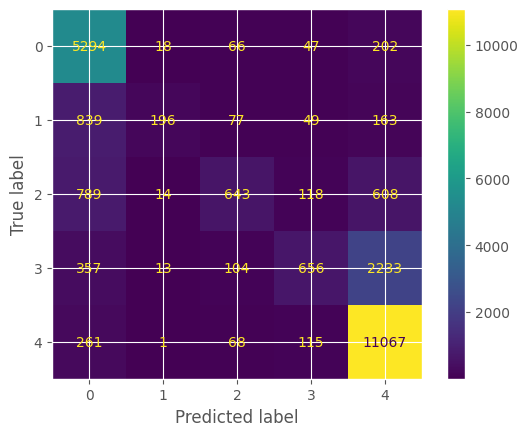

In [ ]:
# Display statistics
predict_and_evaluate_model_performance(lr_model, X_test)

## **Bernoulli NB**

In [ ]:
# Define and fit the model
nb_model=Pipeline([
        ("tfidf",TfidfVectorizer()),
        ("bernominal",BernoulliNB())
])
nb_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('bernominal', BernoulliNB())])

Training Score :  0.6938911575964664
validation Score :  0.11683333333333333
Precision Score :  0.11683333333333333
Recall Score :  0.11683333333333333
F1 Score :  0.11683333333333333
Classification Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.29      0.01      0.02      1382
           2       0.10      0.07      0.08       338
           3       0.17      0.10      0.12       547
           4       0.16      0.71      0.26       853
           5       0.00      0.00      0.00      2880

    accuracy                           0.12      6000
   macro avg       0.12      0.15      0.08      6000
weighted avg       0.11      0.12      0.06      6000



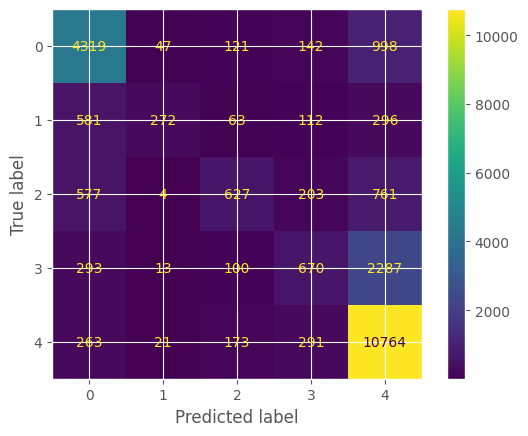

In [ ]:
# Display statistics
predict_and_evaluate_model_performance(nb_model, X_test)

## **XGB Classifier**

In [ ]:
# Define and fit the model
xg_model=Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("xgboost", XGBClassifier())
])
xg_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

Training Score :  0.7682306858904909
validation Score :  0.1135
Precision Score :  0.1135
Recall Score :  0.1135
F1 Score :  0.1135
Classification Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.20      0.01      0.01      1382
           2       0.08      0.04      0.06       338
           3       0.14      0.05      0.07       547
           4       0.17      0.74      0.27       853
           5       0.00      0.00      0.00      2880

    accuracy                           0.11      6000
   macro avg       0.10      0.14      0.07      6000
weighted avg       0.09      0.11      0.05      6000



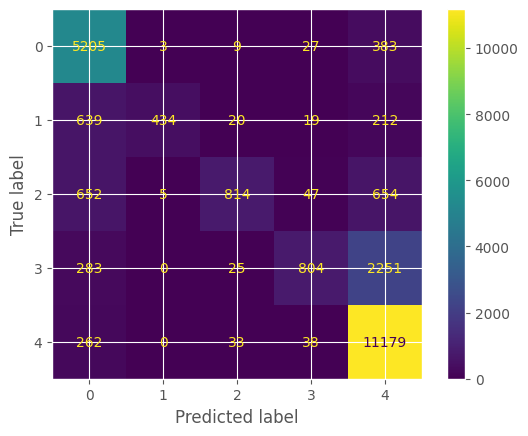

In [ ]:
# Display statistics
predict_and_evaluate_model_performance(xg_model, X_test)

# **Summary**

*   XGB model has achieved the best training score.
*   Bernoulli NB model has achieved the best validation score.
* Bernoulli NB has achieved the best precision score.
* Bernoulli NB has achieved the best recall score.
* Bernoulli NB has achieved the best F1 score.
* This model should be considered as target one.
* It is also possible that considering different model will lead to better results in each aspect.


# **Products with best and worst reviews**

In [ ]:
# The mean score for each product id will be calculated
group_mean_score_id = cols[['review_score']].groupby([cols['product_id']]).agg(mean=('review_score', 'mean')).reset_index()
group_mean_score_id

product_id  mean
0      0009406fd7479715e4bef61dd91f2462  1.00
1      000b8f95fcb9e0096488278317764d19  5.00
2      000d9be29b5207b54e86aa1b1ac54872  5.00
3      0011c512eb256aa0dbbb544d8dffcf6e  1.00
4      001795ec6f1b187d37335e1c4704762e  2.00
...                                 ...   ...
19348  ffedbd68fa6f44e788ff6c2db8094715  1.00
19349  ffef256879dbadcab7e77950f4f4a195  4.75
19350  fff0a542c3c62682f23305214eaeaa24  3.00
19351  fff6177642830a9a94a0f2cba5e476d1  4.00
19352  fffdb2d0ec8d6a61f0a0a0db3f25b441  5.00

[19353 rows x 2 columns]

In [ ]:
# Product ids with maximum mean review_score equals 5
group_mean_score_id[group_mean_score_id['mean'] == group_mean_score_id['mean'].max()]

product_id  mean
1      000b8f95fcb9e0096488278317764d19   5.0
2      000d9be29b5207b54e86aa1b1ac54872   5.0
5      001b237c0e9bb435f2e54071129237e9   5.0
7      001c5d71ac6ad696d22315953758fa04   5.0
11     002c6dab60557c48cfd6c2222ef7fd76   5.0
...                                 ...   ...
19344  ffe013e1b4603e3b0b02fbb159d5b400   5.0
19345  ffe0fc4e02c3559643ac063fa5cf9d07   5.0
19346  ffe8083298f95571b4a66bfbc1c05524   5.0
19347  ffeb228c521d5464d1f71444da96c446   5.0
19352  fffdb2d0ec8d6a61f0a0a0db3f25b441   5.0

[7527 rows x 2 columns]

In [ ]:
# Product_ids with minimum mean review_score equals 1
group_mean_score_id[group_mean_score_id['mean'] == group_mean_score_id['mean'].min()]

product_id  mean
0      0009406fd7479715e4bef61dd91f2462   1.0
3      0011c512eb256aa0dbbb544d8dffcf6e   1.0
17     0043c62d00db47eff6a6bc4cf6bfaeda   1.0
18     0043d1a25ef08fb6f41b8fa6f91742ab   1.0
20     004636c889c7c3dad6631f136b7fa082   1.0
...                                 ...   ...
19313  ff95ac47246ef13e48712ea1ff8df0d9   1.0
19315  ff9dfd2acec3dff6be51b4d28bed8768   1.0
19318  ffa1ce7f2a287ca5e369673bd77d43de   1.0
19334  ffbfa9e143fda4420454d0f4e88a3cd5   1.0
19348  ffedbd68fa6f44e788ff6c2db8094715   1.0

[3165 rows x 2 columns]

In [ ]:
# The mean score for each product category will be calculated
group_mean_score_cat = cols[['review_score']].groupby([cols['product_name']]).agg(mean=('review_score', 'mean')).reset_index()
group_mean_score_cat

product_name      mean
0   agro_industry_and_commerce  3.450704
1             air_conditioning  3.284672
2                          art  3.639175
3        arts_and_craftmanship  3.416667
4                        audio  3.446328
..                         ...       ...
66                  stationery  3.754527
67      tablets_printing_image  3.516129
68                   telephony  3.557629
69                        toys  3.708487
70               watches_gifts  3.616295

[71 rows x 2 columns]

In [ ]:
# Product categories with maximum mean review_score equals 5
group_mean_score_cat[group_mean_score_cat['mean'] == group_mean_score_cat['mean'].max()]

product_name  mean
29  fashion_childrens_clothes   5.0

In [ ]:
# Product categories with minimum mean review_score
group_mean_score_cat[group_mean_score_cat['mean'] == group_mean_score_cat['mean'].min()]

product_name  mean
61  security_and_services   2.5

# **Sellers with only negative comments**

In [ ]:
# Classify comments based on review_score
# Comments with score 1 or 2 are negative
# Comments with score 3 are neutral
# Comments with score 4 or 5 are positive
def comment_trans(df):
  if (df['review_score'] == 1 or df['review_score'] == 2):
    return 'negative'
  if (df['review_score'] == 3):
    return 'neutral'
  if (df['review_score'] == 4 or df['review_score'] == 5):
    return 'positive'

cols['result'] = cols.apply(comment_trans, axis=1)

In [ ]:
# Check the distribution - the most reviews were positive, the least - neutral
cols['result'].value_counts()

result
positive    30921
negative    14358
neutral      4468
Name: count, dtype: int64

In [ ]:
# Amount of each comment (positive, neutral, negative) for each seller
group_result = cols[['result']].groupby([cols['seller_id'], cols['result']]).agg(count=('result', 'count')).reset_index()
group_result

seller_id    result  count
0     0015a82c2db000af6aaaf3ae2ecb0532  negative      1
1     001cca7ae9ae17fb1caed9dfb1094831  negative     38
2     001cca7ae9ae17fb1caed9dfb1094831   neutral      7
3     001cca7ae9ae17fb1caed9dfb1094831  positive     73
4     001e6ad469a905060d959994f1b41e4f  negative      1
...                                ...       ...    ...
4918  fffd5413c0700ac820c7069d66d98c89   neutral      2
4919  fffd5413c0700ac820c7069d66d98c89  positive     17
4920  ffff564a4f9085cd26170f4732393726  negative      8
4921  ffff564a4f9085cd26170f4732393726   neutral      2
4922  ffff564a4f9085cd26170f4732393726  positive      2

[4923 rows x 3 columns]

In [ ]:
# Unique ids from group_result
unique_ids = group_result['seller_id'].unique()

In [ ]:
# Prepare 2 separate dataframes with reviews
negative = group_result[group_result['result'] == 'negative']
neutral_positive = group_result[(group_result['result'] == 'neutral') | (group_result['result'] == 'positive')]

In [ ]:
# Choose unique ids which are present in negative table and are absent in neutral_positive table
fil = ~negative['seller_id'].isin(neutral_positive['seller_id'])
negative[fil]

seller_id    result  count
0     0015a82c2db000af6aaaf3ae2ecb0532  negative      1
4     001e6ad469a905060d959994f1b41e4f  negative      1
21    010da0602d7774602cd1b3f5fb7b709e  negative      5
53    02a2272692e13558373c66db98f05e2e  negative      1
71    0336182e1b3e92f029d5354832045fdf  negative      2
...                                ...       ...    ...
4852  fcf16b7a8697e559f0123190bb30177d  negative      3
4888  fec6912baad85d41729669edd6b4d3b8  negative      1
4889  fedf2c1386e137f296b3bbf3b635e69d  negative      3
4903  ff82e8873fba613f2261a9acc896fd84  negative      1
4911  ffcfefa19b08742c5d315f2791395ee5  negative      1

[278 rows x 3 columns]

In [ ]:
# Display sellers with the worst feedback
sorted = negative[fil].sort_values(['count'], ascending=False)
sorted_top = sorted.head()
sorted_top

seller_id    result  count
1318  4342d4b2ba6b161468c63a7e7cfce593  negative     16
4527  ec2e006556300a79a5a91e4876ab3a56  negative      7
2759  8c3b533c63cca56240f94f1e3a6b18ef  negative      7
779   270d3ef21830ad0ecf3a6c53d08a533a  negative      7
231   0aa2205ca24f113f4658a5c536667426  negative      6

# **Analysis of occurence of word 'price' in reviews**

In [ ]:
# Check first rows
data['review_comment'].head()

0                  i received well stipulated deadline
1    congratulation lannister store i loved shoppin...
2    efficient device on website brand device print...
3                        but little slowfor price good
4             reliable seller ok product delivery time
Name: review_comment, dtype: object

In [ ]:
# Apply comment translate function
data['result'] = data.apply(comment_trans, axis=1)
data.head()

review_comment  review_score    result
0                i received well stipulated deadline             5  positive
1  congratulation lannister store i loved shoppin...             5  positive
2  efficient device on website brand device print...             4  positive
3                      but little slowfor price good             4  positive
4           reliable seller ok product delivery time             5  positive

In [ ]:
# Table filtering reviews with word 'price'
price_count = data[data['review_comment'].str.contains('price')]
price_count

review_comment  review_score  \
3                          but little slowfor price good             4   
268    good quality product exactly advertised low pr...             3   
308    the price great delivery time long more1 month...             3   
309    the price great delivery time long more1 month...             3   
313     great price delivered time great quality product             5   
...                                                  ...           ...   
29721  i really liked it i thought good price i paid ...             4   
29752                          great product great price             5   
29834  great price super well packaged i intend purch...             5   
29891                              good affordable price             5   
29930  i always buy lannister without problem deliver...             4   

         result  
3      positive  
268     neutral  
308     neutral  
309     neutral  
313    positive  
...         ...  
29721  positive  
29752  positive  
29834  positive  
29891  positive  
29930  positive  

[501 rows x 3 columns]

In [ ]:
# Word price has appeared mostly in positive or neutral reviews from clients
group_1 = price_count[['review_score']].groupby([cols['result']]).agg(count=('review_score', 'count')).reset_index()
group_1

result  count
0  negative    118
1   neutral     44
2  positive    339

In [ ]:
# Word price has appeared mostly in positive or neutral reviews from clients
group_2 = price_count[['review_score']].groupby([cols['review_score']]).agg(count=('review_score', 'count')).reset_index()
group_2

review_score  count
0             1     88
1             2     30
2             3     44
3             4     87
4             5    252

In [ ]:
# Table filtering reviews with word 'competitor' - almost all with positive feedback
competitor_count = data[data['review_comment'].str.contains('competitor')]
competitor_count

review_comment  review_score  \
5295   i always liked shopping site due difference st...             5   
5296   i always liked shopping site due difference st...             5   
13683  great purchase i make often due cheaper price ...             5   
17466    much longer delivery time competitor thirty day             1   
20850  a previous time i performed lannistercom i com...             5   
21695  product well packaged delivery took longer com...             5   
24169  i recommend store everything came correctly ev...             5   
27042  product delivered time the case good quality s...             3   

         result  
5295   positive  
5296   positive  
13683  positive  
17466  negative  
20850  positive  
21695  positive  
24169  positive  
27042   neutral